<a href="https://colab.research.google.com/github/divyakathane/FDIP/blob/main/ASS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

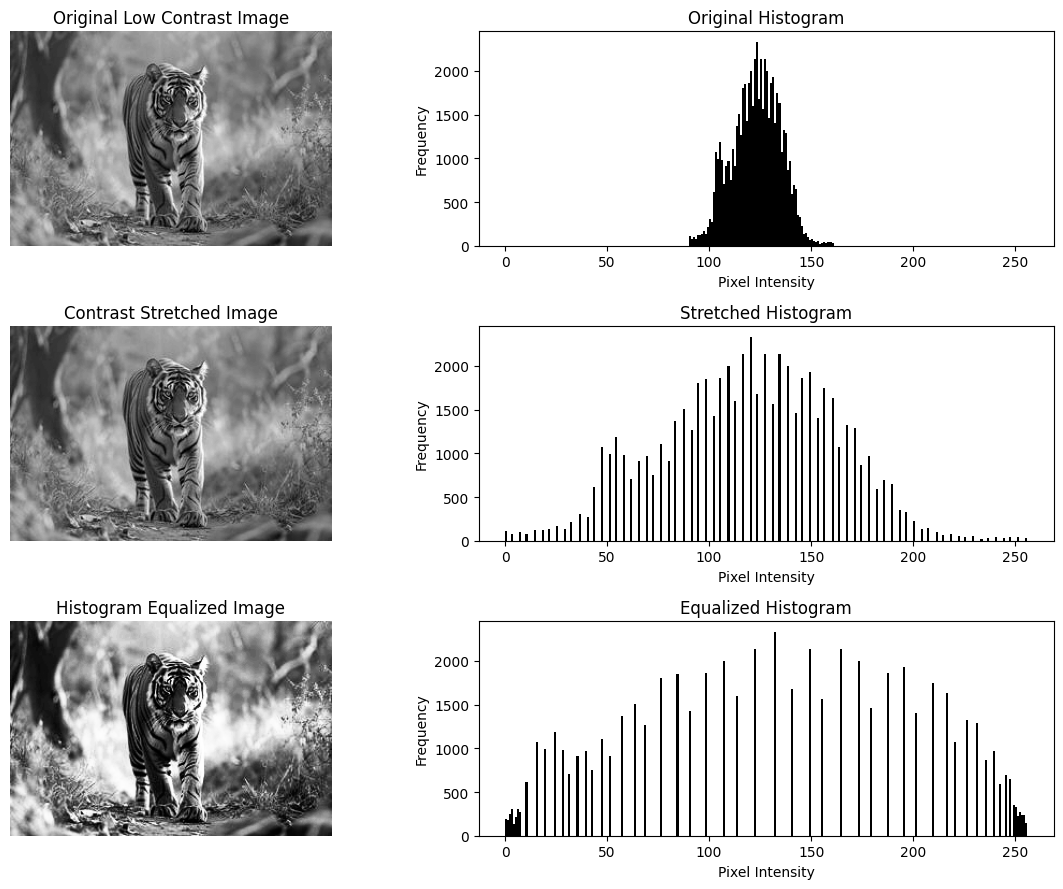

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Step 1: Read the input grayscale image
# ------------------------------------------------------------
image = cv2.imread("/content/fdip pic.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    print("❌ Error: Image not found! Please check the path or filename.")
    exit()

# ------------------------------------------------------------
# Step 2: Generate a low contrast version of the image (for demo)
# Comment out this part if your image is already low contrast
# ------------------------------------------------------------
low_contrast = cv2.normalize(image, None, alpha=90, beta=160, norm_type=cv2.NORM_MINMAX)
cv2.imwrite("low_contrast_image.jpg", low_contrast)
image = low_contrast  # Use the low contrast image for processing

# ------------------------------------------------------------
# Step 3: Contrast Stretching
# Formula: s = ((r - r_min) / (r_max - r_min)) * 255
# ------------------------------------------------------------
r_min = np.min(image)
r_max = np.max(image)

# Avoid divide-by-zero error
if r_max == r_min:
    stretched = image.copy()
else:
    stretched = ((image - r_min) / (r_max - r_min)) * 255
    stretched = stretched.astype(np.uint8)

# ------------------------------------------------------------
# Step 4: Histogram Equalization
# ------------------------------------------------------------
equalized = cv2.equalizeHist(image)

# ------------------------------------------------------------
# Step 5: Function to plot histogram
# ------------------------------------------------------------
def plot_histogram(img, title):
    plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# ------------------------------------------------------------
# Step 6: Display Results
# ------------------------------------------------------------
plt.figure(figsize=(12, 9))

# Original Image & Histogram
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Low Contrast Image")
plt.axis("off")

plt.subplot(3, 2, 2)
plot_histogram(image, "Original Histogram")

# Contrast Stretched Image & Histogram
plt.subplot(3, 2, 3)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis("off")

plt.subplot(3, 2, 4)
plot_histogram(stretched, "Stretched Histogram")

# Histogram Equalized Image & Histogram
plt.subplot(3, 2, 5)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.subplot(3, 2, 6)
plot_histogram(equalized, "Equalized Histogram")

plt.tight_layout()
plt.show()

